# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. CRISP-DM is somewhat effective, user friendly, and easy to use. However, interm of speed and costs, it needs more work to be done.

2. It is concluded that finding the rigtt level of work is still challenging.

3. For a single, small scale projects, the improvements are probably less than expected.

4. At the end, it will be difficult to find the model that will adapt to the constantly changes new special business environment and meet the needs of those who would make such important business decisions. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [53]:
df = pd.read_csv('/home/yssuh/Downloads/practical_application_II_starter/data/vehicles.csv')

In [54]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [60]:
df = df.replace('?', np.nan)
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [61]:
df.describe(include='object')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [62]:
df.select_dtypes(include=[np.float64])

,year,odometer
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
426875,2019.0,32226.0
426876,2020.0,12029.0
426877,2020.0,4174.0
426878,2018.0,30112.0


In [65]:
data = data.dropna(subset=['price'])
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [66]:
data = data.fillna(data.mean())

/tmp/ipykernel_35609/476127175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


<AxesSubplot:>

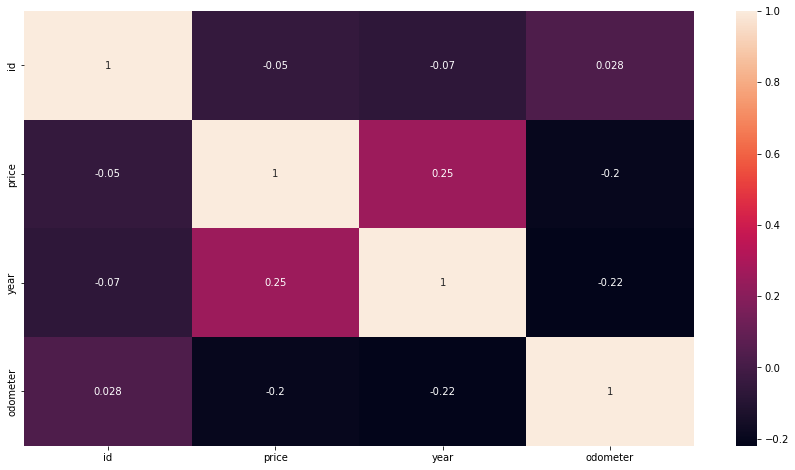

In [70]:
corr=numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [11]:
df['id'].value_counts()

7305672709    1
7303662021    1
7304447506    1
7304443076    1
7303940820    1
             ..
7310932515    1
7310932712    1
7310932859    1
7310933030    1
7302301268    1
Name: id, Length: 34868, dtype: int64

In [12]:
df['price'].value_counts()

0        2372
1         683
9995      373
6995      372
7995      366
         ... 
30981       1
49981       1
36981       1
15880       1
4790        1
Name: price, Length: 3136, dtype: int64

In [13]:
df['year'].value_counts()

2013.0    2996
2015.0    2842
2014.0    2822
2016.0    2643
2012.0    2482
          ... 
1937.0       1
1933.0       1
1905.0       1
1939.0       1
1931.0       1
Name: year, Length: 89, dtype: int64

In [14]:
df['odometer'].value_counts()

145000.0    85
100000.0    85
0.0         81
113000.0    79
98000.0     77
            ..
34731.0      1
58901.0      1
12747.0      1
10500.0      1
69550.0      1
Name: odometer, Length: 16689, dtype: int64

/home/yssuh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


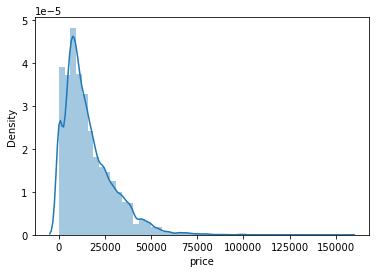

In [15]:
sns.distplot(df['price'])
plt.show()

/home/yssuh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


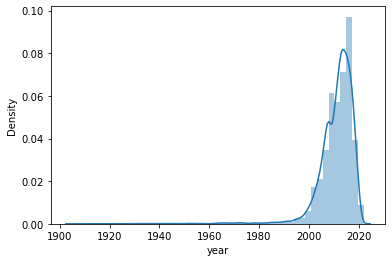

In [16]:
sns.distplot(df['year'])
plt.show()

In [17]:
df['model'].value_counts()

f-150                        943
silverado 1500               929
1500                         482
2500                         332
sierra 1500                  330
                            ... 
5 sport                        1
titan king cab                 1
4runner sport edition 4wd      1
mustang cobra                  1
cruze, 2lt                     1
Name: model, Length: 5139, dtype: int64

/home/yssuh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

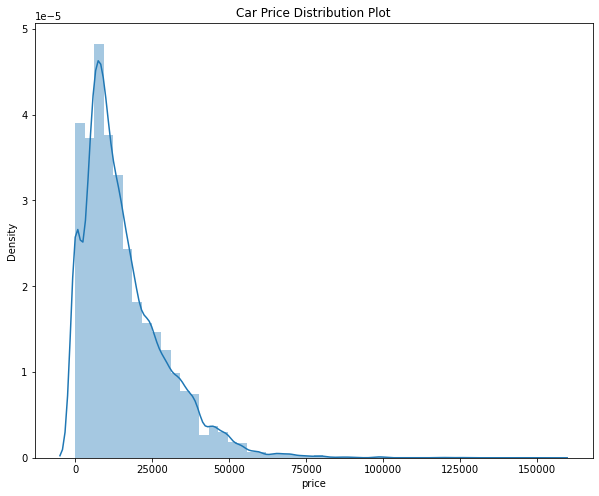

In [18]:
plt.figure(figsize=(10,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df.price)


<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

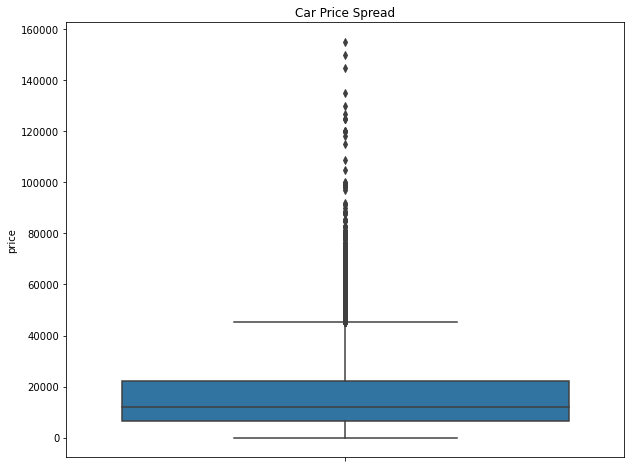

In [19]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

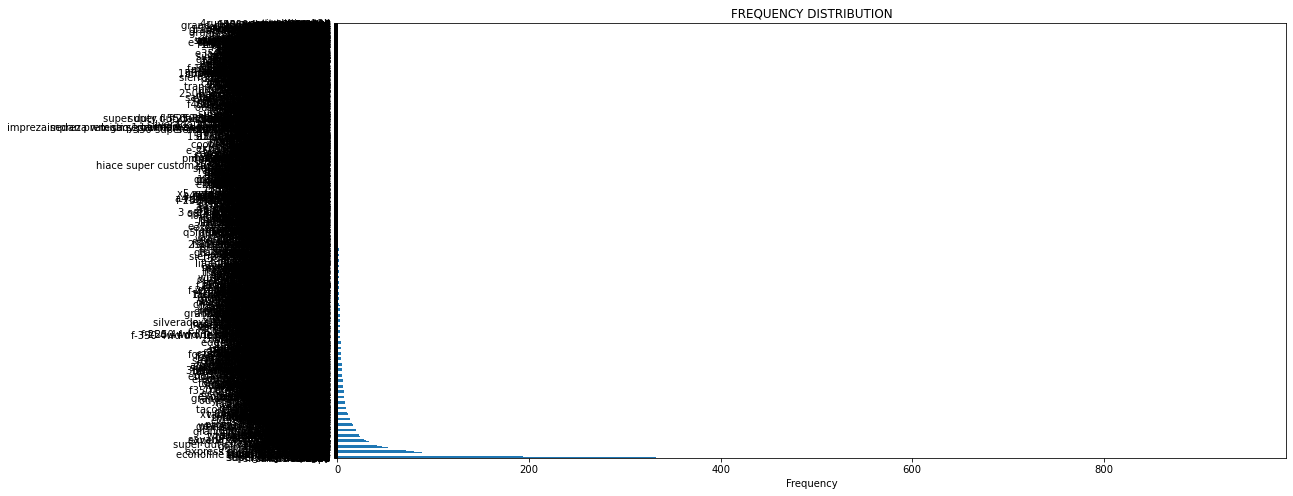

In [20]:
plt.figure(figsize=(17,8))
df.model.value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.title('FREQUENCY DISTRIBUTION')
plt.show()

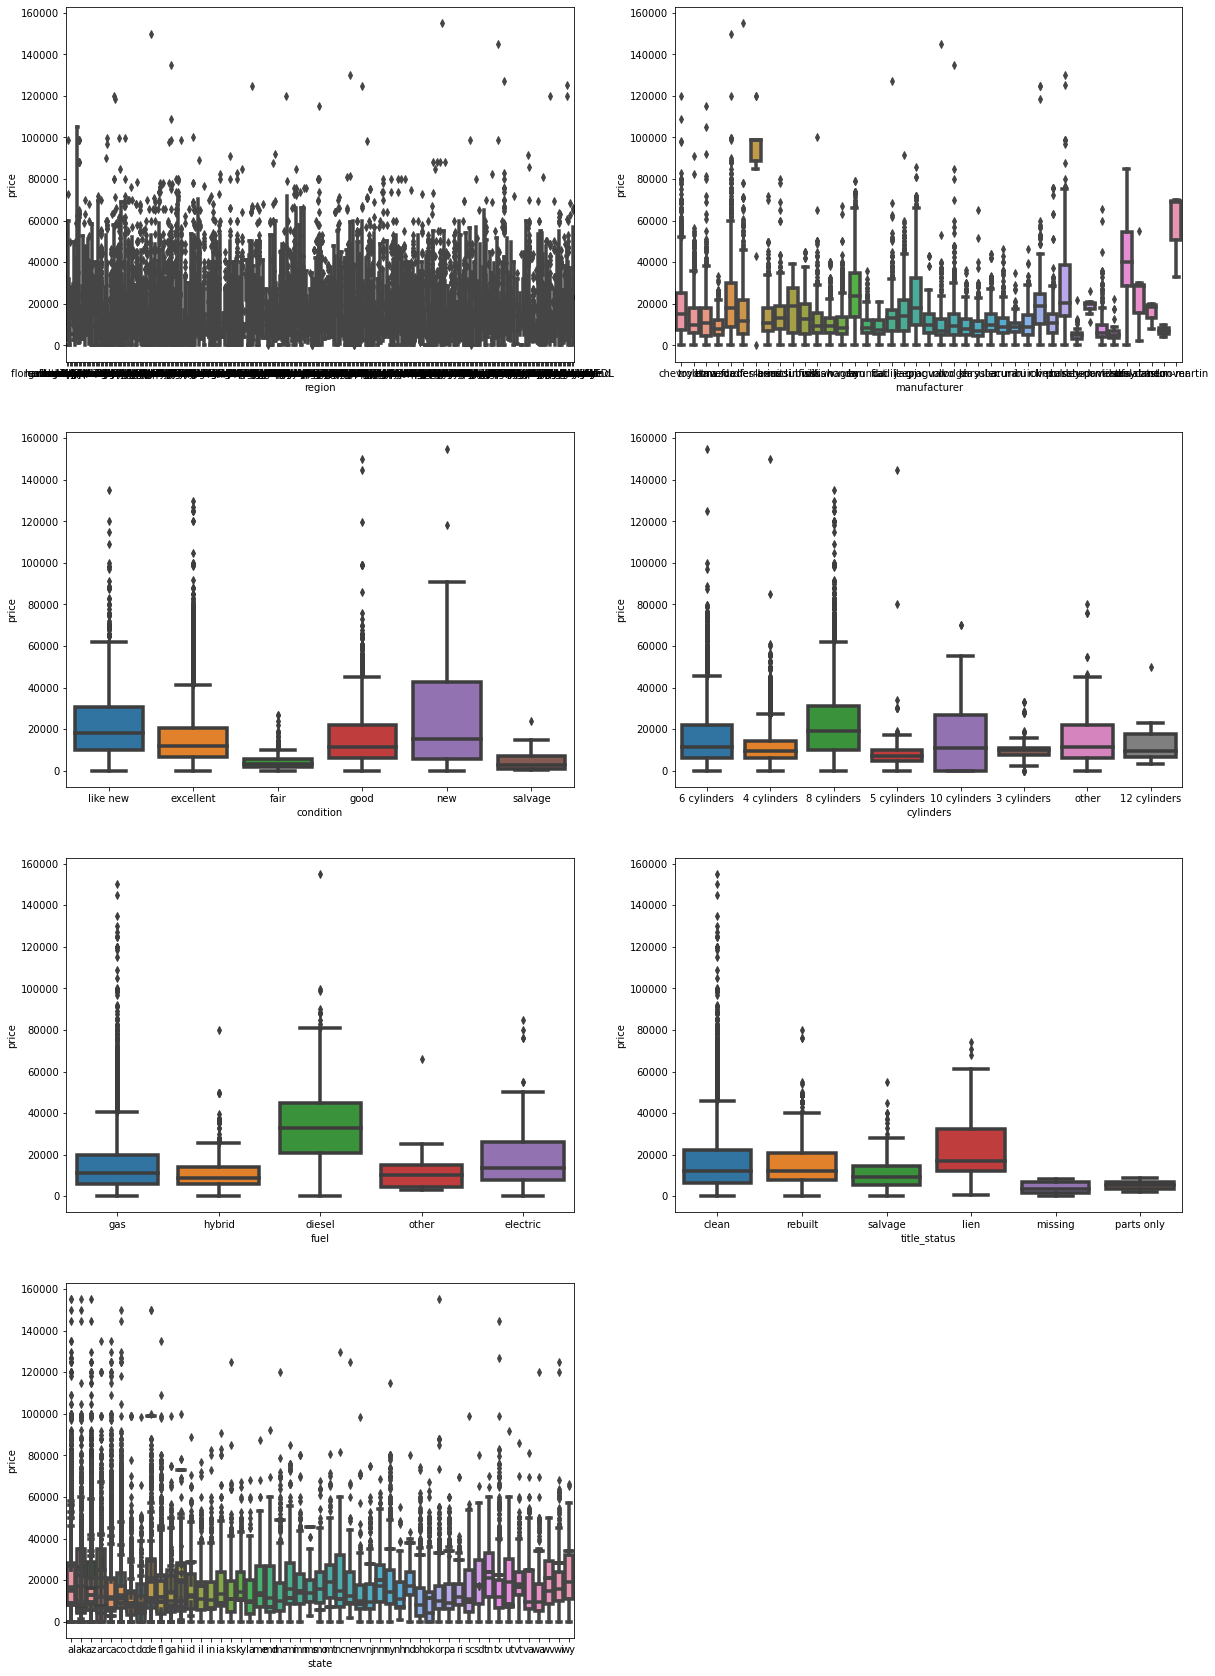

In [21]:
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'region', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,2)
sns.boxplot(x = 'manufacturer', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,3)
sns.boxplot(x = 'condition', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,4)
sns.boxplot(x = 'cylinders', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,5)
sns.boxplot(x = 'fuel', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,6)
sns.boxplot(x = 'title_status', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'VIN', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'drive', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'size', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'type', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'paint_color', y = 'price', data = df, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'state', y = 'price', data = df, linewidth=3.5)

plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [23]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [24]:
x=df['year']
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [25]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]
y_train=y_train[:,np.newaxis] 
y_test=y_test[:,np.newaxis]

/tmp/ipykernel_35609/261728657.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
/tmp/ipykernel_35609/261728657.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]
/tmp/ipykernel_35609/261728657.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train=y_train[:,np.newaxis]
/tmp/ipykernel_35609/261728657.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test=y_test[:,np.newax

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
slope = model.coef_

In [28]:
intercept = model.intercept_

In [29]:
print(f' The formula is y = {slope}*X+{intercept}')

 The formula is y = [[467.49447784]]*X+[-924379.44974917]


In [30]:
y_train_pred=model.predict(x_train)
y_test_pred = model.predict(x_test)

In [31]:
r2_score(y_train,y_train_pred)

0.06314304118963843

In [32]:
r2_score(y_test,y_test_pred)

0.06760637709315032

In [33]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Text(0.5, 1.0, 'Price vs year')

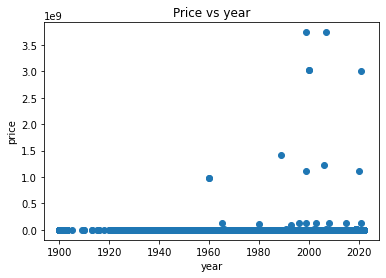

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

np.corrcoef(data['price'], data['year'])
plt.scatter(data['year'], data['price'])
plt.xlabel("year")
plt.ylabel("price")
plt.title("Price vs year")

Text(0.5, 1.0, 'Price vs odometer')

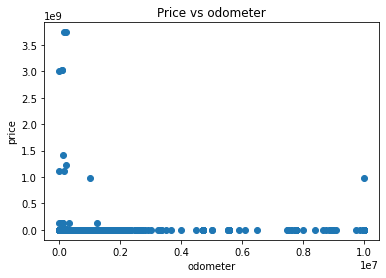

In [81]:
np.corrcoef(data['price'], data['odometer'])
plt.scatter(data['odometer'], data['price'])
plt.xlabel("odometer")
plt.ylabel("price")
plt.title("Price vs odometer")

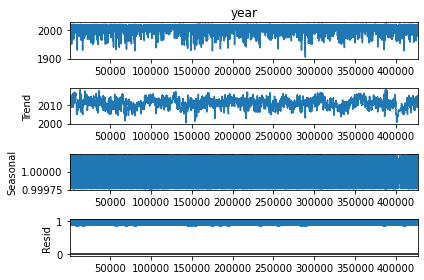

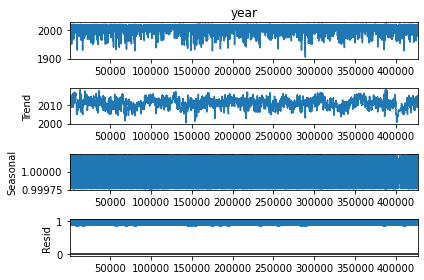

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonality = seasonal_decompose(df['year'], model='multiplicative',period=30)
seasonality.plot()

Text(0.5, 1.0, 'Used car prices[1900-2020]')

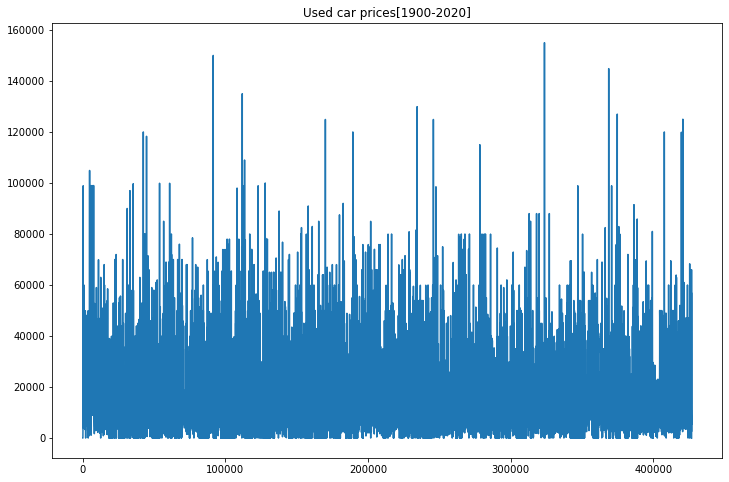

In [35]:
plt.figure(figsize=(12,8))
df['price'].plot()
plt.title('Used car prices[1900-2020]')

/home/yssuh/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Stationary series after lag difference.')

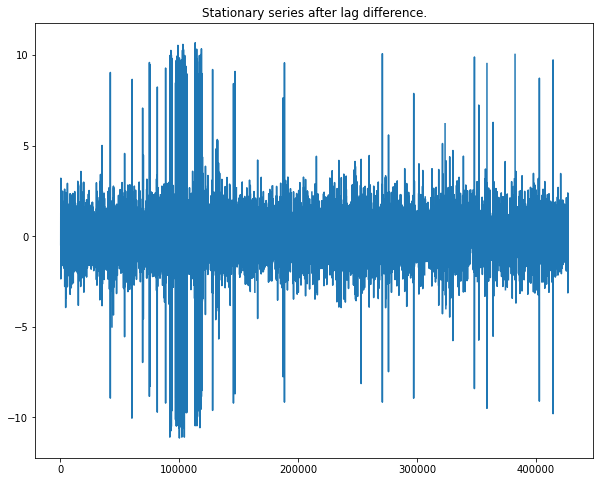

In [36]:
df['log'] = np.log(df['price'])
df['diff'] = df['log'].diff(periods=1)
plt.figure(figsize=(10,8))
df['diff'].plot()
plt.title('Stationary series after lag difference.')

In [82]:
def knn_train_test_with_k(train_col, target_col, data, lst_k_values):
    """Same as the function knn_train_test above but trains the model with 
       different k-values
       
       Args:
        train_col(str): name of the column which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
        lst_k_values(obj): list of different k-values
        
    Returns:
        k_r2(obj): dictionary where the keys are the k-values and the values are the corresponding r2-score
    
    """
    
    np.random.seed(41)
        
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[[train_col]], train_data[target_col])

        # Make predictions using model with parameter k
        predicted_labels = knn.predict(test_data[[train_col]])

        # Calculate and return r2 score
        r2 = r2_score(test_data[target_col], predicted_labels)
        
        k_r2[k] = r2
        
    return k_r2

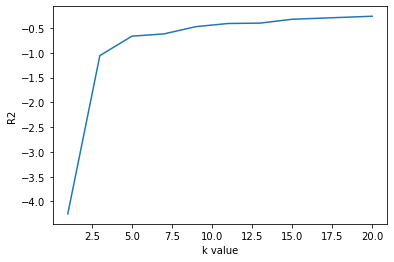

In [84]:
for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [85]:
feature_avg_r2 = {}
for k,v in k_r2_results.items():
    avg_r2 = np.mean(list(v.values()))
    feature_avg_r2[k] = avg_r2
    
series_avg_r2 = pd.Series(feature_avg_r2)
series_avg_r2.sort_values(ascending=False)

id   -0.93941
dtype: float64

In [86]:
def knn_train_test_several_cols(train_cols, target_col, data, lst_k_values):
    """As above but allows for more than one feature.
    
       Args:
        train_cols(obj):list of names of the columns which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
        lst_k_values(obj): list of different k-values
        
    Returns:
        r2(float): r2 score
        k_r2(obj): dictionary where the keys are the k-values and the values are the corresponding r2-score
    
    """
    
    np.random.seed(41)
    
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[train_cols], train_data[target_col])

        predictions = knn.predict(test_data[train_cols])

        r2 = r2_score(test_data[target_col], predictions)       
        k_r2[k] = r2
        
    return k_r2


Coming back to our business questions, we have seen that the relationship between price and year that car was made  plays indeed the most important role in predicting the price of a car. Other factors seem less significant in determining the actural rpuce of used cads. The best model for car price prediction which I found is a linear regression model since considering the nature of both realtionship. knn-model which uses just the two features price and year. With a r2-score of 85% we feel confident to give a positive answer to the last business question, i.e. I believe I ca predict the price of a care based on its features with reasonable accuracy.